In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import joblib

In [14]:
# Cargar el dataset desde el archivo CSV
file_path = "data/fraud.csv"
df = pd.read_csv(file_path)


In [15]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## 📖 Diccionario de Datos

| Variable           | Descripción                                                                 |
|--------------------|------------------------------------------------------------------------------|
| **step**           | Unidad de tiempo: cada paso representa 1 hora.                              |
| **type**           | Tipo de transacción realizada en línea (ej. TRANSFER, CASH_OUT, etc.).      |
| **amount**         | Monto total de la transacción.                                               |
| **nameOrig**       | Identificador del cliente que inició la transacción.                        |
| **oldbalanceOrg**  | Saldo del cliente **antes** de realizar la transacción.                     |
| **newbalanceOrig** | Saldo del cliente **después** de la transacción.                            |
| **nameDest**       | Identificador del destinatario de la transacción.                           |
| **oldbalanceDest** | Saldo del destinatario **antes** de recibir el dinero.                      |
| **newbalanceDest** | Saldo del destinatario **después** de recibir el dinero.                    |
| **isFraud**        | Indica si la transacción fue fraudulenta (`1`) o legítima (`0`).            |

# EDA Y visualizacion de datos

In [3]:
# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
# INFORMACIÓN GENERAL
print("✅ Dimensiones:", df.shape)
print("\n📋 Tipos de datos:")
print(df.dtypes)
print("\n🔍 Valores nulos:")
print(df.isnull().sum())

✅ Dimensiones: (6362620, 11)

📋 Tipos de datos:
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

🔍 Valores nulos:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [5]:
# Columna target
print("\n🎯 Distribución de 'isFraud':")
print(df['isFraud'].value_counts(normalize=True) * 100)



🎯 Distribución de 'isFraud':
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


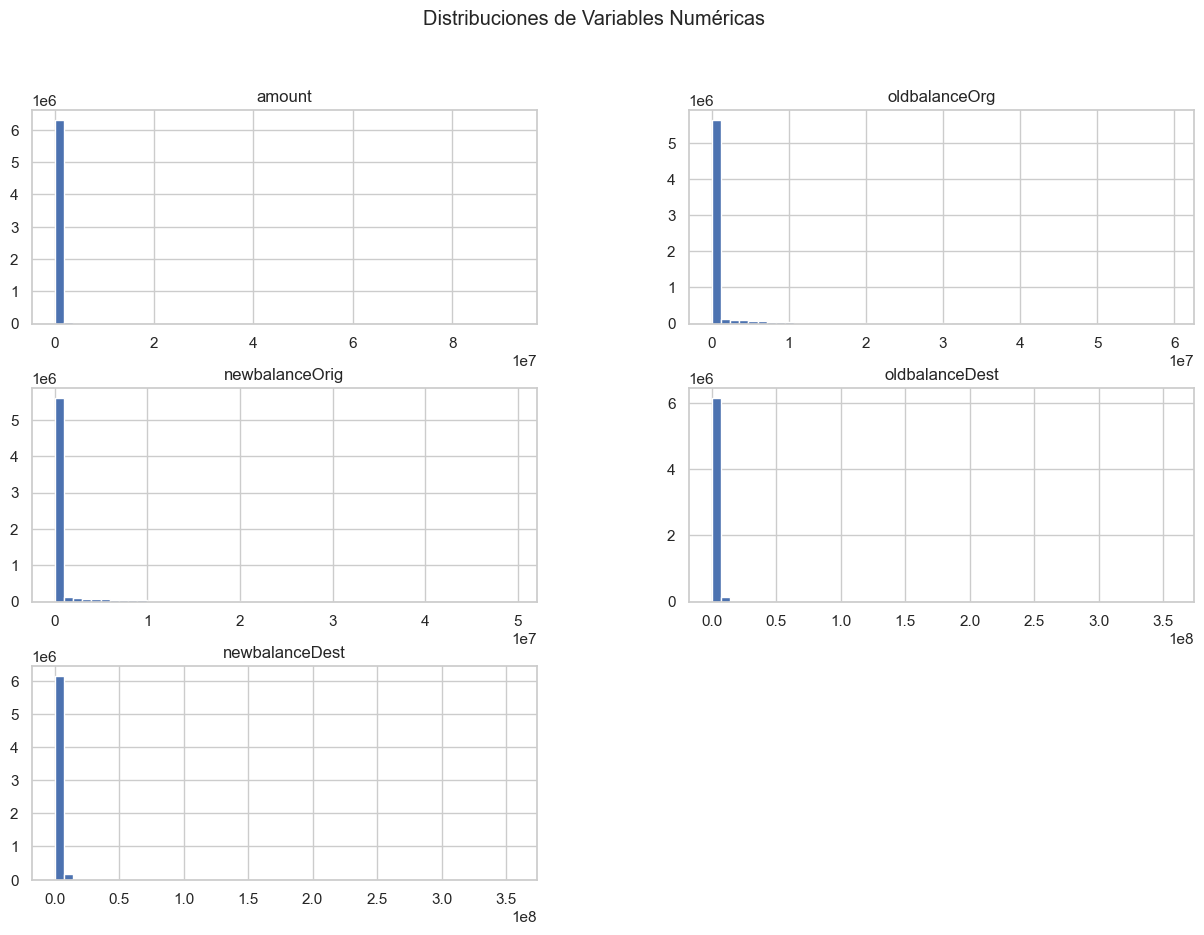

In [6]:
# Histograma para variables numéricas clave
num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df[num_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Distribuciones de Variables Numéricas')
plt.show()

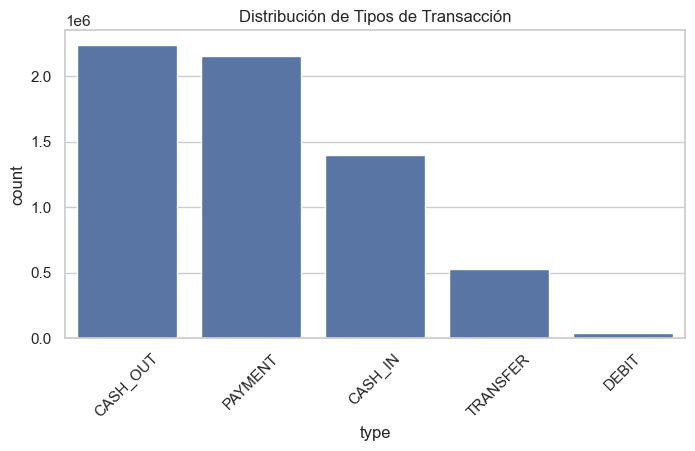

In [7]:
# Conteo de tipos de transacción
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Distribución de Tipos de Transacción')
plt.xticks(rotation=45)
plt.show()

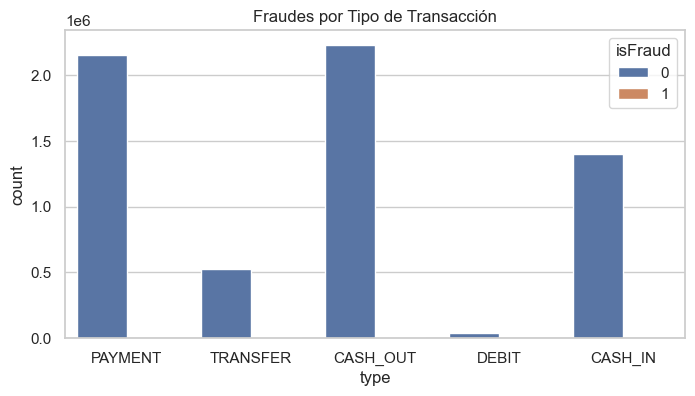

In [8]:
# ANÁLISIS BIVARIANTE

# Fraude por tipo de transacción
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Fraudes por Tipo de Transacción')
plt.show()

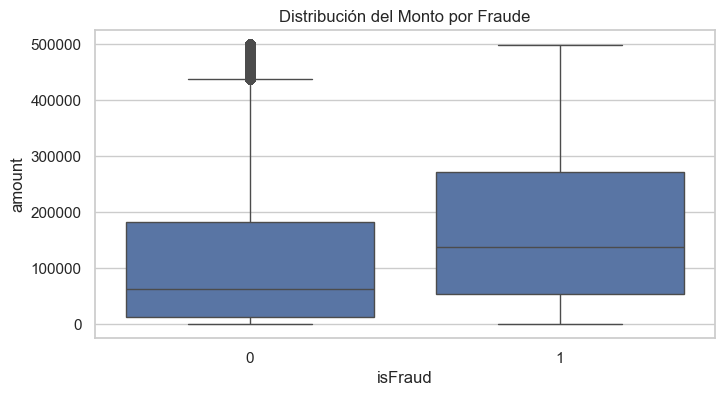

In [9]:
# Monto promedio por fraude/no fraude
plt.figure(figsize=(8,4))
sns.boxplot(data=df[df['amount'] < 500000], x='isFraud', y='amount')
plt.title('Distribución del Monto por Fraude')
plt.show()

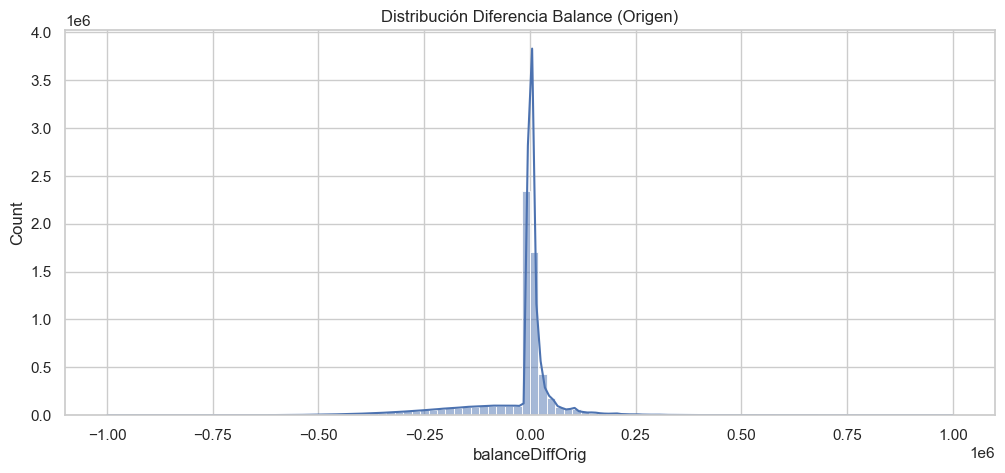

In [10]:
# DIFERENCIAS EN BALANCES
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

plt.figure(figsize=(12,5))
sns.histplot(df[df['balanceDiffOrig'].abs() < 1e6]['balanceDiffOrig'], bins=100, kde=True)
plt.title('Distribución Diferencia Balance (Origen)')
plt.show()


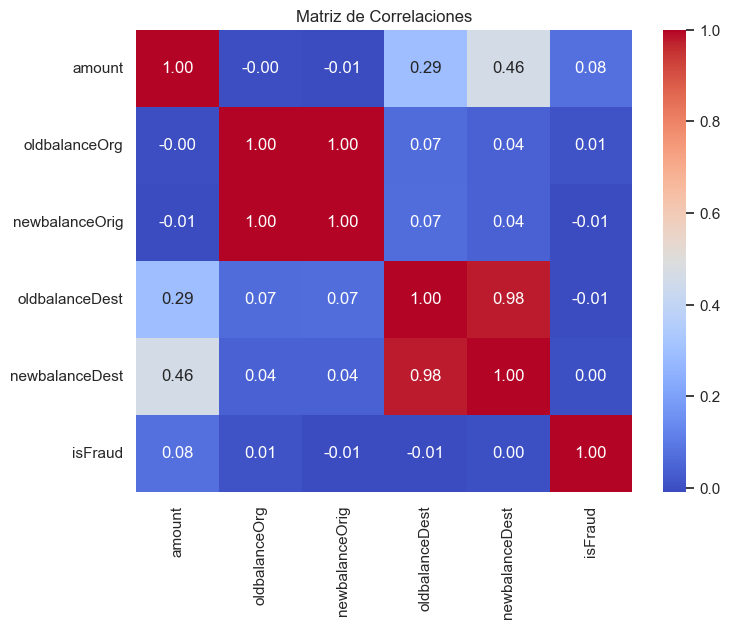

In [11]:
# MATRIZ DE CORRELACIÓN
corr_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones')
plt.show()

In [12]:
# CONCLUSIÓN SOBRE BALANCE DE CLASES
fraud_rate = df['isFraud'].mean()
print(f"\n⚠️ Solo el {fraud_rate:.4%} de las transacciones son fraudulentas (clase desbalanceada).")


⚠️ Solo el 0.1291% de las transacciones son fraudulentas (clase desbalanceada).


## 🔍 Conclusiones del Análisis Exploratorio (EDA)

1. **Desbalance de clases**:  
   Solo el ~0.13% de las transacciones son fraudulentas. Este desbalance extremo justifica el uso de técnicas de re-muestreo (como `RandomUnderSampler`) y métricas más representativas como `AUC` y `F1 Score`.

2. **Tipo de transacción y fraude**:
   - Las transacciones del tipo `TRANSFER` y `CASH_OUT` concentran el 100% de los fraudes detectados.
   - Ningún fraude fue detectado en tipos `PAYMENT`, `DEBIT` o `CASH_IN`.

3. **Distribución del monto**:
   - Las transacciones fraudulentas tienden a tener montos significativamente más altos.
   - Se observan outliers en ambas clases, pero el rango es más amplio en fraudes.

4. **Anomalías en saldos**:
   - Se detectaron casos donde el saldo del origen y el destino no cambian (saldo 0 antes y después), lo cual no es lógico si se transfiere dinero. Estas fueron capturadas con nuevas variables (`error_balance_orig`, `error_balance_dest`).

5. **Matriz de correlación**:
   - Alta correlación entre `oldbalanceOrg` y `newbalanceOrig`, así como entre `oldbalanceDest` y `newbalanceDest`, como era de esperarse.
   - La variable `amount` no está fuertemente correlacionada con otras, lo cual puede ser informativo para el modelo.

6. **Relevancia de ingeniería de features**:
   - Variables creadas como `balance_diff_orig`, `amount_to_balance_ratio` y errores de saldo pueden ofrecer señales claras para diferenciar transacciones normales de fraudulentas.

---

Este análisis no solo ayuda a entender el dataset, sino que justifica las decisiones de procesamiento y modelado que se toman en etapas posteriores.